In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np

In [56]:
#load dataset
train_df = pd.read_csv('train_loan.csv')
test_df = pd.read_csv('test_loan.csv')

In [59]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [63]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117308df0>,
      dtype=object)

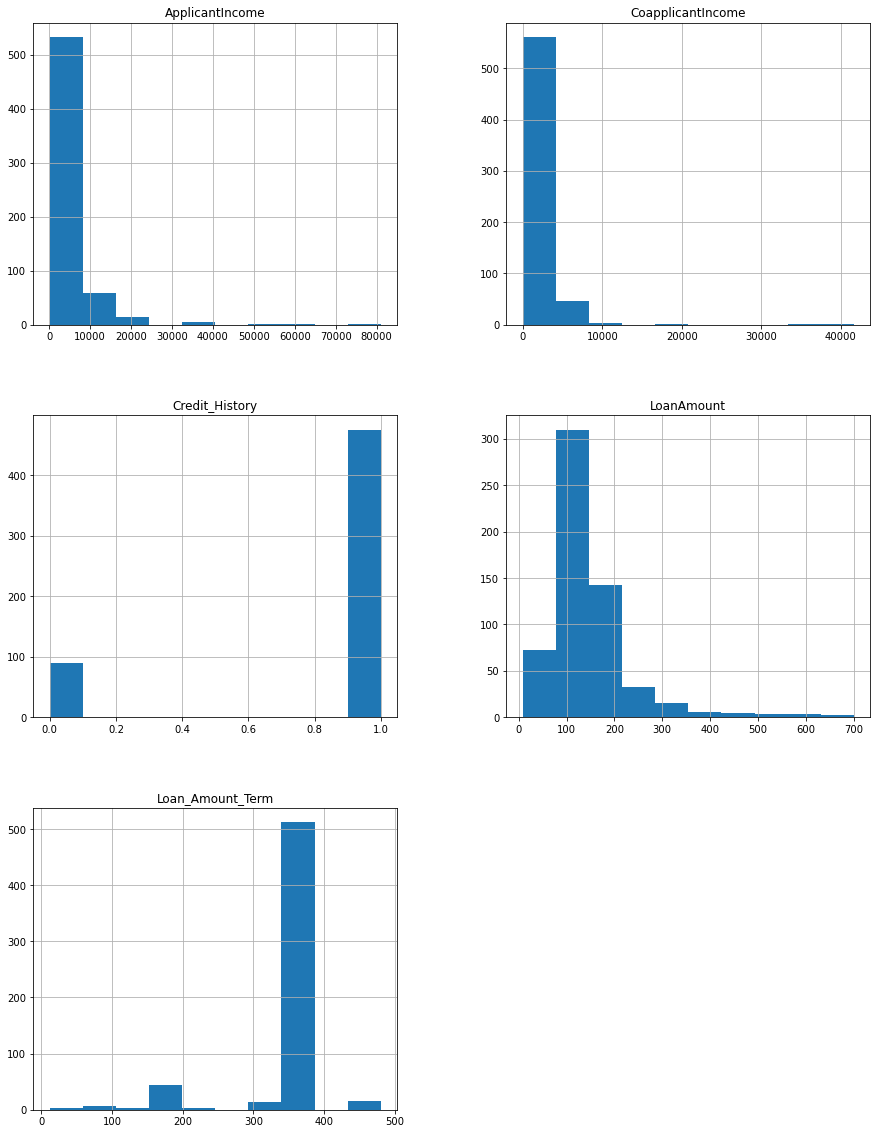

In [64]:
#show distribution of contunious variable
train_df.hist(figsize = (15,20))

Loan_ID


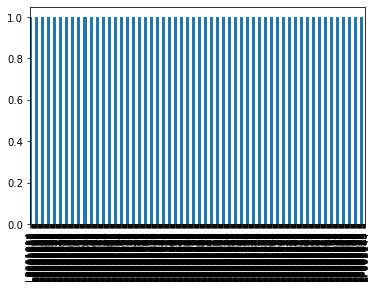

Gender


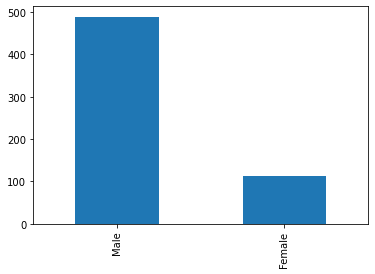

Married


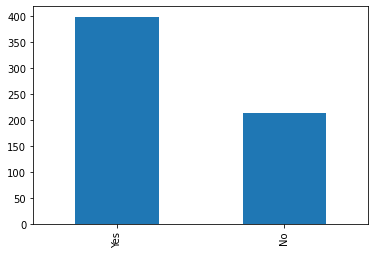

Dependents


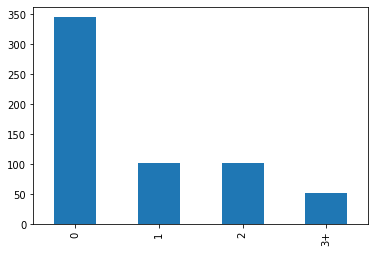

Education


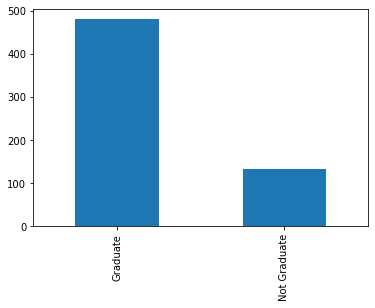

Self_Employed


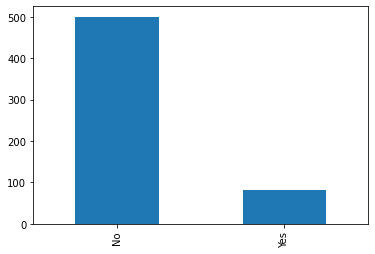

Property_Area


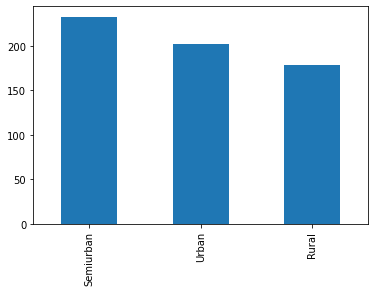

Loan_Status


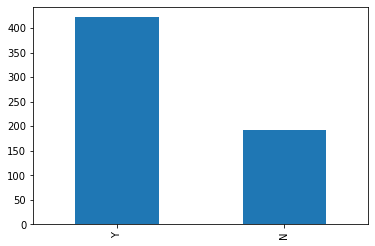

In [67]:
#plot bar graph for categorical variables
import matplotlib.pyplot as plt
for col in train_df.select_dtypes(include=object).columns:
    print(col)
    train_df[col].value_counts().plot(kind='bar')
    plt.show()

In [70]:
#Map loan status Y and N to 1 and 0 respectively
train_df['Loan_Status'] = train_df['Loan_Status'].replace({'Y':1,'N':0})

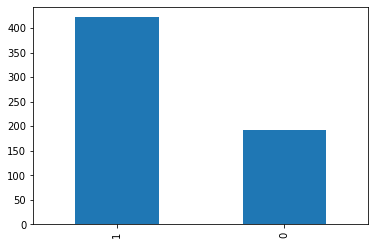

In [71]:
train_df['Loan_Status'].value_counts().plot(kind='bar')

In [72]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


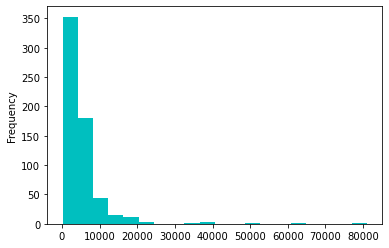

In [73]:
train_df.ApplicantIncome.plot(kind='hist', color='c', bins=20)

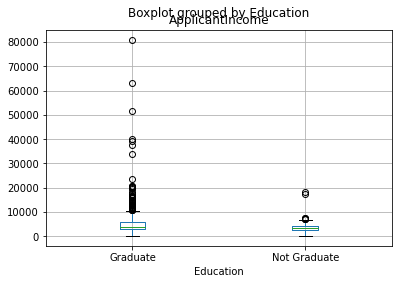

In [74]:
train_df.boxplot(column='ApplicantIncome', by='Education')

In [78]:
#Data Exploratory on Credit History
temp_data = train_df['Credit_History'].value_counts(ascending=True)
temp_data2 = train_df.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=np.mean)
print (temp_data)

print ('\nProbility of getting loan for each Credit History class:')
print (temp_data2)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [79]:
married = train_df.pivot_table(values='Loan_Status',index=['Married'],aggfunc=np.mean)

print ('\nProbility of getting loan for Married against Not Married:')
print (married)


Probility of getting loan for Married against Not Married:
         Loan_Status
Married             
No          0.629108
Yes         0.716080


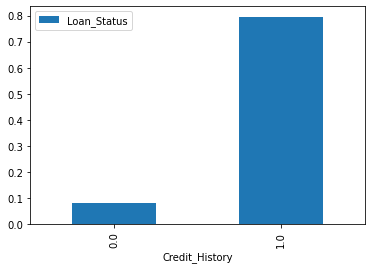

In [80]:
#probability of getting a loan due to your credit score
temp_data2.plot(kind='bar')

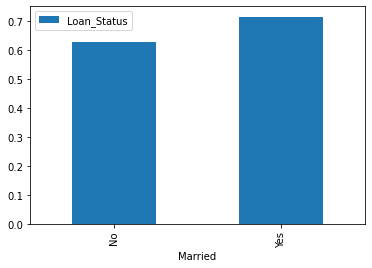

In [81]:
#probability of getting a loan by Marital status
married.plot(kind='bar')

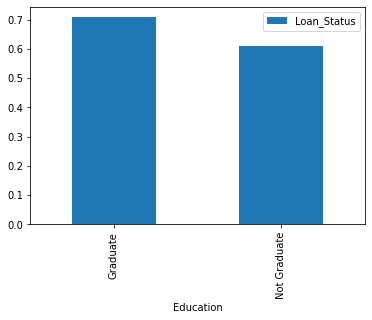

In [84]:
#probability of getting a loan by Education
degree = train_df.pivot_table(values='Loan_Status', index=['Education'], aggfunc=np.mean)
degree.plot(kind='bar')

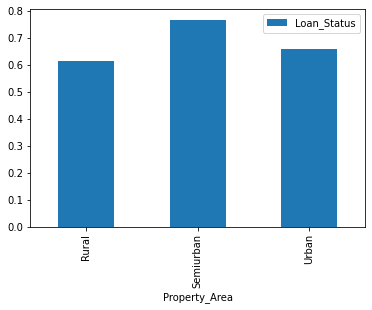

In [86]:
property_area = train_df.pivot_table(values='Loan_Status', index=['Property_Area'], aggfunc=np.mean)
property_area.plot(kind='bar')

In [ ]:
#check for null data

In [87]:
train_df.apply(lambda x:sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
#replace missing values Self Employed, Gender,Married,Dependant,Credit History
train_df['Self_Employed'].fillna('No', inplace=True)
train_df['Gender'].fillna('Male', inplace=True)
train_df['Married'].fillna('Yes', inplace=True)
train_df['Dependents'].fillna(0, inplace=True)
train_df['Credit_History'].fillna(1.0, inplace=True)

In [89]:
#fill continous variables with median 
train_df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
train_df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

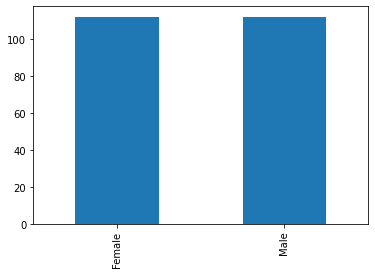

In [90]:
#Fixing unbalanced variables - Gender
g = train_df.groupby('Gender')
train_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)

#check viz of gender
train_df['Gender'].value_counts().plot(kind='bar')

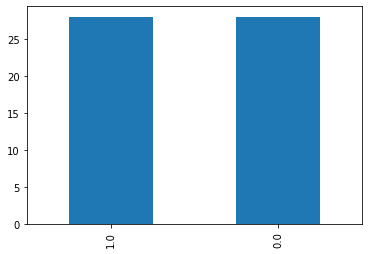

In [91]:
#Fixing unbalanced variables - Credit History
credit = train_df.groupby('Credit_History')
train_df = pd.DataFrame(credit.apply(lambda x: x.sample(credit.size().min()))).reset_index(drop=True)

#check viz of gender
train_df['Credit_History'].value_counts().plot(kind='bar')

In [92]:
#combine incomes 
train_df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [101]:
# copy the data frame so we've still got the original in case we need it
df_copy = train_df.copy()

In [110]:
# define the list of features to keep
selected_features = ['Gender','Married','Dependents','Education','Self_Employed','TotalIncome','LoanAmount','Loan_Amount_Term',
                    'Credit_History','Property_Area','Loan_Status']

In [116]:
# update the data frame
df_cleaned = df_copy[selected_features]

In [117]:
#encode variables
df_cleaned = pd.get_dummies(df_cleaned, prefix_sep='_', drop_first=True)

In [118]:
df_cleaned.head()

,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,4166.0,99.000000,360.0,0.0,0,0,0,1,0,0,0,0,0,1,0
1,4685.0,135.609735,360.0,0.0,0,0,0,0,0,0,1,1,0,0,1
2,4263.0,71.000000,360.0,0.0,0,0,0,1,0,0,0,0,0,0,1
3,3158.0,103.000000,360.0,0.0,0,0,0,1,0,0,0,0,0,1,0
4,3510.0,181.000000,360.0,0.0,0,1,1,1,0,0,0,1,0,0,1


In [119]:
#set features and targets
targetName="Loan_Status"
featureNames=df_cleaned.columns[df_cleaned.columns != targetName]

#Data Preparation
X = df_cleaned[featureNames].values
y = df_cleaned[targetName].values

In [120]:
# set features and targets
print(X.shape,y.shape)

(56, 14) (56,)


In [123]:
#Import models from scikit learn models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [143]:
# normalise features
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

In [144]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44, 14) (44,)
(12, 14) (12,)


In [145]:
#create a model - Logistic Regression
lr_model = LogisticRegression(random_state=0)

# train the model on our training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [146]:
# make some predictions using the model
# store the predictions in prediction
prediction = lr_model.predict(X_test)

#evaluate model
print('score for logistic regression {0:.2f}'.format(lr_model.score(X_test, y_test)))

score for logistic regression 0.75


In [147]:
# performance metrics
# accuracy
print('accuracy for logistic regression : {0:.2f}'.format(metrics.accuracy_score(y_test, prediction)))
# confusion matrix
print('confusion matrix for logistic regression : \n {0}'.format(metrics.confusion_matrix(y_test, prediction)))
# precision 
print('precision for logistic regression : {0:.2f}'.format(metrics.precision_score(y_test, prediction)))
# precision 
print('recall for logistic regression : {0:.2f}'.format(metrics.recall_score(y_test, prediction)))

accuracy for logistic regression : 0.75
confusion matrix for logistic regression : 
 [[6 1]
 [2 3]]
precision for logistic regression : 0.75
recall for logistic regression : 0.60


In [148]:
print(prediction)

[1 1 0 0 0 0 0 1 0 1 0 0]
